## Moonboard Sequence Simulator

In [1]:
import numpy as np
import os
import copy
import pickle
import heapq
import matplotlib.pyplot as plt
import pandas as pd
from preprocessing_helper import *

In [2]:
cwd = os.getcwd()
parent_wd = cwd.replace('/preprocessing', '')
raw_data_path = parent_wd + '/preprocessing/processed_data_xy_mode'  
url_data_path = parent_wd + '/raw_data/moonGen_scrape_2016_cp'
left_hold_feature_path = parent_wd + '/raw_data/HoldFeature2016LeftHand.csv'
right_hold_feature_path = parent_wd + '/raw_data/HoldFeature2016RightHand.csv'

## 1. Read all preprocessed data


### 1-1. Read hand feature files

In [3]:
LeftHandfeatures = pd.read_csv(left_hold_feature_path, dtype=str)
RightHandfeatures = pd.read_csv(right_hold_feature_path, dtype=str)

# convert features from pd dataframe to dictionary of left and right hand
RightHandfeature_dict = {}
LeftHandfeature_dict = {}
for index in RightHandfeatures.index:
    LeftHandfeature_item = LeftHandfeatures.loc[index]
    LeftHandfeature_dict[(int(LeftHandfeature_item['X_coord']), int(LeftHandfeature_item['Y_coord']))] = np.array(
        list(LeftHandfeature_item['Difficulties'])).astype(int)
    RightHandfeature_item = RightHandfeatures.loc[index]
    RightHandfeature_dict[(int(RightHandfeature_item['X_coord']), int(RightHandfeature_item['Y_coord']))] = np.array(
        list(RightHandfeature_item['Difficulties'])).astype(int)

### 1-2. Read moonboard problems with url file

In [4]:
with open(url_data_path, 'rb') as f:
    MoonBoard_2016_withurl = pickle.load(f)

### 1-3. Read preprocessed moonboard problem

In [5]:
with open(raw_data_path, 'rb') as f:
    MoonBoard_2016_raw = pickle.load(f)  

#### Here you can see the possible range of next right hand using sum of two Gaussisan. Remaining left hand in origin

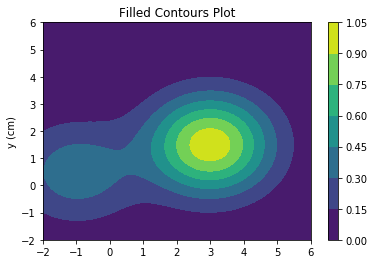

In [6]:
xlist = np.linspace(-2,6, 100)
ylist = np.linspace(-2,6, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = makeGaussian((X,Y), 3, (0,0))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_ylabel('y (cm)')
plt.show()

## 2. Demonstration of detailed analysis on a single problem

### 2-1. load one specific problem

In [7]:
keyNum = "342797"    
moonboardTest = (MoonBoard_2016_raw["X_dict_withgrade"])[keyNum]

In [10]:
testbeta = beta(moonboardTest.T)
status = [beta(moonboardTest.T), beta(moonboardTest.T)]
print("keyNum = ", keyNum)
print(status[0].allHolds)
moonboardTestUrl = MoonBoard_2016_withurl[keyNum]
print(moonboardTestUrl["url"])
# Initialized Start hold of two different beta
status[0].addStartHolds(0)
status[1].addStartHolds(1)

operationList = ["RH", "LH"]
tempstatus = []
tempstatus2 = []
tempstatus3 = []
distanceScore = []

keyNum =  342797
[[ 5.  4.  9.  4.  1.  1.  5.  4.  1.  0.]
 [ 0.  2.  4.  2.  0.  0.  4.  7.  0.  0.]
 [ 1.  5.  2.  0.  0.  0.  0.  8.  0.  0.]
 [ 0.  0.  4.  9.  4.  0.  7.  9.  0.  0.]
 [ 0.  0.  6.  4.  4.  0.  3. 11.  0.  0.]
 [ 0.  3.  6.  3.  0.  0.  4. 12.  0.  0.]
 [ 1.  4.  3.  1.  0.  0.  2. 14.  0.  0.]
 [ 2.  5.  2.  1.  0.  0.  1. 15.  0.  0.]
 [ 2.  6.  8.  6.  2.  0.  3. 17.  0.  1.]]
https://moonboard.com/Problems/View/342797/chats


### 2-2. Beamer search process 

In [9]:
# Run the algorithm for 6 times
totalRun = status[0].totalNumOfHold - 1
for i in range(totalRun):  # how many new move you wan to add
    print (i)
    status = addNewBeta(status)
    finalScore = [] 
    for i in status:   
        finalScore.append(i.overallSuccessRate())
    largestIndex = heapq.nlargest(4, range(len(finalScore)), key=finalScore.__getitem__)
    if (status[largestIndex[0]].isFinished and status[largestIndex[1]].isFinished) == True:
        break

0
[0, 0, 1] ['LH', 'RH', 'LH'] [147.09694124]
[0, 0, 1] ['LH', 'RH', 'LH'] [147.09694124]
[0, 0, 1] ['LH', 'RH', 'RH'] [92.60035394]
[0, 0, 1] ['LH', 'RH', 'RH'] [92.60035394]
[0, 0, 2] ['LH', 'RH', 'LH'] [65.32602493]
[0, 0, 2] ['LH', 'RH', 'LH'] [65.32602493]
[0, 0, 3] ['LH', 'RH', 'RH'] [54.2957249]
[0, 0, 3] ['LH', 'RH', 'RH'] [54.2957249]
1
[0, 0, 1, 3] ['LH', 'RH', 'LH', 'RH'] [207.39931721]
[0, 0, 1, 3] ['LH', 'RH', 'LH', 'RH'] [207.39931721]
[0, 0, 1, 2] ['LH', 'RH', 'RH', 'LH'] [106.39664984]
[0, 0, 1, 2] ['LH', 'RH', 'RH', 'LH'] [106.39664984]
[0, 0, 2, 4] ['LH', 'RH', 'LH', 'RH'] [58.83563347]
[0, 0, 2, 4] ['LH', 'RH', 'LH', 'RH'] [58.83563347]
[0, 0, 3, 4] ['LH', 'RH', 'RH', 'LH'] [57.45155419]
[0, 0, 3, 4] ['LH', 'RH', 'RH', 'LH'] [57.45155419]
2
[0, 0, 1, 3, 4] ['LH', 'RH', 'LH', 'RH', 'LH'] [165.96935332]
[0, 0, 1, 3, 4] ['LH', 'RH', 'LH', 'RH', 'LH'] [165.96935332]
[0, 0, 1, 3, 5] ['LH', 'RH', 'LH', 'RH', 'LH'] [151.39323371]
[0, 0, 1, 3, 5] ['LH', 'RH', 'LH', 'RH', 'LH

In [10]:
# last sorting for the best 5
finalScore = [] 
print(status)
for i in status:   
    finalScore.append(i.overallSuccessRate())   
largestIndex = heapq.nlargest(4, range(len(finalScore)), key=finalScore.__getitem__)

[<preprocessing_helper.beta object at 0x126e17ad0>, <preprocessing_helper.beta object at 0x126e17f50>, <preprocessing_helper.beta object at 0x126e17950>, <preprocessing_helper.beta object at 0x126e171d0>, <preprocessing_helper.beta object at 0x126e25cd0>, <preprocessing_helper.beta object at 0x126e25150>, <preprocessing_helper.beta object at 0x126e25650>, <preprocessing_helper.beta object at 0x126e256d0>]


In [11]:
print(moonboardTestUrl["url"])
print ("After Beamer search, the most possible hand sequence and the successRate:")
for i in largestIndex:
    print(status[i].handSequence, status[i].handOperator, status[i].overallSuccessRate())    

https://moonboard.com/Problems/View/342797/chats
After Beamer search, the most possible hand sequence and the successRate:
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]
[0, 0, 1, 3, 4, 5, 7, 8] ['LH', 'RH', 'LH', 'RH', 'LH', 'RH', 'LH', 'RH'] [98.50396893]


### 2-3. Here you can find one problem's best hand sequence. Feel free to change key to see other result

To find other keys, try MoonBoard_2016_raw["X_dict_benchmark_withgrade"].keys()

In [12]:
produce_sequence("20149", MoonBoard_2016_raw["X_dict_benchmark_withgrade"], n_return = 1, printout = True)

https://moonboard.com/Problems/View/20149/ladybug
After Beamer search, the most possible hand sequence and the successRate:
['J5', 'G6', 'A9', 'F11', 'C13', 'A14', 'D18']
[0, 1, 2, 4, 5, 6, 7] ['LH', 'RH', 'LH', 'RH', 'LH', 'LH', 'RH'] [6.55920813]


{0: <preprocessing_helper.beta at 0x126e257d0>}

#### I check the hand sequence of 20 problem. 90% are exactly same with human's prediction. Other 10% are acceptable sequence. Next we will start generate move sequence

## 3. Process the entire dataset and save the results
For the output of this part, each move is represented as 22x1 vector

In [22]:
save_path = cwd + '/benchmark_withgrade_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_benchmark_withgrade"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

result saved.
[]


In [23]:
save_path = cwd + '/benchmark_withgrade_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_benchmark_withgrade"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

result saved.
[]


In [24]:
save_path = cwd + '/benchmark_nograde_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_benchmark_nograde"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

result saved.
[]


In [25]:
save_path = cwd + '/benchmark_nograde_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_benchmark_nograde"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

result saved.
[]


In [26]:
save_path = cwd + '/nonbenchmark_withgrade_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_withgrade"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

Raw data with key 19362 contains error
result saved.
['19362']


In [27]:
save_path = cwd + '/nonbenchmark_withgrade_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_withgrade"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

result saved.
[]


In [28]:
save_path = cwd + '/nonbenchmark_nograde_move_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_nograde"]
output, fail_list = moveGeneratorForAllProblem(processed_data, save_path, print_result = False)
print(fail_list)

result saved.
[]


In [29]:
save_path = cwd + '/nonbenchmark_nograde_move_seq_Y'
processed_data_Y = MoonBoard_2016_raw["Y_dict_nograde"]
output, fail_list = gradeTransFromFontToV(processed_data_Y, save_path)
print(fail_list)

key 363336 failed.
key 363335 failed.
key 350368 failed.
key 349610 failed.
key 349049 failed.
key 348915 failed.
key 348858 failed.
key 348670 failed.
key 348669 failed.
key 348432 failed.
key 346738 failed.
key 344743 failed.
key 339916 failed.
key 339325 failed.
key 337916 failed.
key 335566 failed.
key 312004 failed.
key 310949 failed.
key 309657 failed.
key 309311 failed.
key 248997 failed.
key 246092 failed.
key 231401 failed.
key 231392 failed.
result saved.
['363336', '363335', '350368', '349610', '349049', '348915', '348858', '348670', '348669', '348432', '346738', '344743', '339916', '339325', '337916', '335566', '312004', '310949', '309657', '309311', '248997', '246092', '231401', '231392']


## 4. Use pure hand sequence generator
The output of this part only contains the hand sequence, without other vectors

#### Test with one problem

In [6]:
beamerBeta = produce_sequence("20149", MoonBoard_2016_raw["X_dict_benchmark_withgrade"], n_return = 1, printout = True)[0]
numOfMoves = len(beamerBeta.handSequence) 
routeHandSequence = beamerBeta.handSequence  
routeOpSequence = beamerBeta.handOperator 
handStringList = []

for orderOfHand in range(numOfMoves): 
    targetCoordinate = beamerBeta.getXYFromOrder(routeHandSequence[orderOfHand])
    newHandStr = coordinateToString(targetCoordinate) + "-" + routeOpSequence[orderOfHand]
    handStringList.append(newHandStr)
print(handStringList)    

https://moonboard.com/Problems/View/20149/ladybug
After Beamer search, the most possible hand sequence and the successRate:
['J5', 'G6', 'A9', 'F11', 'C13', 'A14', 'D18']
[0, 1, 2, 4, 5, 6, 7] ['LH', 'RH', 'LH', 'RH', 'LH', 'LH', 'RH'] [6.55920813]
['J5-LH', 'G6-RH', 'A9-LH', 'F11-RH', 'C13-LH', 'A14-LH', 'D18-RH']


#### Run through entire dataset

In [ ]:
save_path = cwd + '/nonbenchmarkNoGrade_handString_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_nograde"]
handStringSeqGeneratorForAllProblem(processed_data, save_path, print_result = True)

In [610]:
save_path = cwd + '/benchmark_handString_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_benchmark_withgrade"]
handStringSeqGeneratorForAllProblem(processed_data, save_path, print_result = True)

Complete 337509
Complete 332721
Complete 332646
Complete 325637
Complete 325079
Complete 324257
Complete 322941
Complete 322939
Complete 321511
Complete 321097
Complete 320798
Complete 320394
Complete 314508
Complete 311645
Complete 310143
Complete 310106
Complete 309814
Complete 308058
Complete 307834
Complete 306777
Complete 306776
Complete 306062
Complete 305694
Complete 305656
Complete 300214
Complete 297887
Complete 292263
Complete 281994
Complete 279557
Complete 274947
Complete 273016
Complete 260849
Complete 256493
Complete 254625
Complete 251124
Complete 251082
Complete 249317
Complete 243461
Complete 241018
Complete 234401
Complete 232300
Complete 229614
Complete 227999
Complete 226072
Complete 214484
Complete 213011
Complete 202064
Complete 201921
Complete 201020
Complete 199740
Complete 199290
Complete 196769
Complete 196284
Complete 192888
Complete 192428
Complete 192386
Complete 191609
Complete 190906
Complete 189969
Complete 189344
Complete 184714
Complete 184462
Complete

{'337509': ['K5-LH', 'K5-RH', 'F7-LH', 'I11-RH', 'F14-LH', 'D17-RH', 'B18-LH'],
 '332721': ['I5-LH', 'I5-RH', 'F9-LH', 'I12-RH', 'C15-LH', 'C18-RH'],
 '332646': ['K5-LH', 'I5-RH', 'E10-LH', 'G13-RH', 'E15-LH', 'I18-RH'],
 '325637': ['I5-LH', 'I5-RH', 'H7-RH', 'D10-LH', 'H14-RH', 'D18-LH'],
 '325079': ['F5-LH',
  'F5-RH',
  'C7-LH',
  'D10-RH',
  'C12-LH',
  'E13-RH',
  'E15-LH',
  'G18-RH'],
 '324257': ['G2-LH', 'G2-RH', 'C7-LH', 'G11-RH', 'H14-LH', 'J14-RH', 'H18-LH'],
 '322941': ['F5-LH', 'F5-RH', 'G9-RH', 'B11-LH', 'G13-RH', 'E15-LH', 'I18-RH'],
 '322939': ['C5-RH', 'B6-LH', 'A9-LH', 'F11-RH', 'E16-LH', 'I18-RH'],
 '321511': ['E6-LH',
  'E6-RH',
  'G9-RH',
  'G10-LH',
  'I12-RH',
  'F14-LH',
  'H16-RH',
  'E18-LH'],
 '321097': ['A5-LH', 'A5-RH', 'B8-RH', 'C10-LH', 'G13-RH', 'E18-LH'],
 '320798': ['I5-LH', 'I5-RH', 'F9-LH', 'G11-RH', 'D16-LH', 'H18-RH'],
 '320394': ['B3-RH',
  'D5-LH',
  'E7-RH',
  'F7-LH',
  'J10-RH',
  'H12-LH',
  'G14-LH',
  'D15-RH',
  'A18-LH'],
 '314508': ['K5-

In [611]:
save_path = cwd + '/benchmarkNoGrade_handString_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_benchmark_nograde"]
handStringSeqGeneratorForAllProblem(processed_data, save_path, print_result = True)

Complete 341104
Complete 335177
Complete 333650
Complete 322352
Complete 241045
Complete 126612
Complete 93258
Complete 62575
Complete 25904
result saved.


{'341104': ['B3-LH',
  'A5-RH',
  'C7-LH',
  'F9-RH',
  'D10-LH',
  'F12-RH',
  'C14-LH',
  'E16-RH',
  'C18-LH'],
 '335177': ['D6-LH', 'D6-RH', 'F8-RH', 'C12-LH', 'H15-RH', 'H18-LH'],
 '333650': ['J2-LH', 'G6-RH', 'F8-LH', 'F10-RH', 'C15-LH', 'I18-RH'],
 '322352': ['D6-LH', 'D6-RH', 'D8-RH', 'D10-LH', 'F15-RH', 'H18-LH'],
 '241045': ['D3-RH',
  'B4-LH',
  'G7-LH',
  'I8-RH',
  'K12-RH',
  'H14-LH',
  'H15-RH',
  'C18-LH'],
 '126612': ['A5-LH', 'A5-RH', 'D10-RH', 'F12-LH', 'I15-RH', 'H18-LH'],
 '93258': ['B4-RH', 'D5-LH', 'I9-RH', 'F10-LH', 'J14-RH', 'K18-LH'],
 '62575': ['K6-LH', 'K6-RH', 'K7-RH', 'D10-LH', 'H14-RH', 'A16-LH', 'A18-RH'],
 '25904': ['G2-LH',
  'G2-RH',
  'D7-LH',
  'E10-RH',
  'I11-RH',
  'J14-LH',
  'G17-RH',
  'C18-LH']}

In [612]:
save_path = cwd + '/nonbenchmark_handString_seq_X'
processed_data = MoonBoard_2016_raw["X_dict_withgrade"]
handStringSeqGeneratorForAllProblem(processed_data, save_path, print_result = True)

Complete 342797
Complete 342777
Complete 342750
Complete 342668
Complete 342655
Complete 342634
Complete 342633
Complete 342596
Complete 342556
Complete 342547
Complete 342543
Complete 342541
Complete 342526
Complete 342512
Complete 342472
Complete 342469
Complete 342458
Complete 342455
Complete 342450
Complete 342396
Complete 342386
Complete 342357
Complete 342347
Complete 342343
Complete 342335
Complete 342300
Complete 342290
Complete 342288
Complete 342273
Complete 342270
Complete 342265
Complete 342256
Complete 342229
Complete 342221
Complete 342208
Complete 342206
Complete 342197
Complete 342179
Complete 342178
Complete 342157
Complete 342128
Complete 342117
Complete 342109
Complete 342105
Complete 342094
Complete 342092
Complete 342090
Complete 342089
Complete 342086
Complete 342071
Complete 342069
Complete 342065
Complete 342057
Complete 342032
Complete 342025
Complete 341985
Complete 341968
Complete 341966
Complete 341965
Complete 341960
Complete 341953
Complete 341952
Complete

{'342797': ['F5-LH',
  'F5-RH',
  'E8-LH',
  'H10-RH',
  'D12-LH',
  'E13-RH',
  'B16-LH',
  'D18-RH'],
 '342777': ['F5-LH',
  'F5-RH',
  'C8-LH',
  'G9-RH',
  'E10-LH',
  'G13-RH',
  'E15-LH',
  'G17-RH',
  'E18-LH'],
 '342750': ['F5-LH',
  'F5-RH',
  'E8-LH',
  'H10-RH',
  'E11-LH',
  'G13-RH',
  'E15-LH',
  'G18-RH'],
 '342668': ['G4-RH',
  'E6-LH',
  'G9-RH',
  'B10-LH',
  'E12-RH',
  'C13-LH',
  'E16-RH',
  'D18-LH'],
 '342655': ['F5-LH',
  'F5-RH',
  'G8-RH',
  'E10-LH',
  'I12-RH',
  'E13-LH',
  'E15-LH',
  'G18-RH'],
 '342634': ['F5-LH',
  'F5-RH',
  'G8-RH',
  'E10-LH',
  'G13-RH',
  'E15-LH',
  'G17-RH',
  'E18-LH'],
 '342633': ['F5-LH',
  'F5-RH',
  'G8-RH',
  'E10-LH',
  'G13-RH',
  'E15-LH',
  'G17-RH',
  'E18-LH'],
 '342596': ['F5-LH',
  'F5-RH',
  'E8-LH',
  'G9-RH',
  'E11-LH',
  'G12-RH',
  'E15-LH',
  'G18-RH'],
 '342556': ['C5-LH',
  'F5-RH',
  'C10-LH',
  'D10-RH',
  'B13-LH',
  'E16-RH',
  'E18-LH'],
 '342547': ['D5-RH',
  'E6-LH',
  'B8-LH',
  'D9-RH',
  'B10-LH',